In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime as dt

### Read a Google company data table in an appropriate format and calculate the necessary parameters (mean, standard deviation, minimum and maximum, etc.) for each of the columns of the necessary data tables.

In [32]:
google_stock = pd.read_csv('gogl.us.txt')
google_stock

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,141.94,143.84,141.20,143.180,89902,0
1,2005-02-28,143.70,147.19,139.47,143.140,124965,0
2,2005-03-01,141.79,142.57,131.36,134.500,229663,0
3,2005-03-02,135.27,139.11,135.06,137.560,88113,0
4,2005-03-03,138.59,138.59,132.24,134.890,120294,0
...,...,...,...,...,...,...,...
3196,2017-11-06,7.91,8.32,7.91,8.250,565788,0
3197,2017-11-07,8.22,8.22,8.07,8.170,206210,0
3198,2017-11-08,8.18,8.20,8.02,8.075,285029,0
3199,2017-11-09,7.86,8.00,7.85,7.880,125624,0


In [33]:
google_stock.describe()

,Open,High,Low,Close,Volume,OpenInt
count,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3201.0
mean,57.214269,58.265101,56.055632,57.133071,8.679383e+04,0.0
std,37.065446,37.551037,36.401649,36.973254,1.220090e+05,0.0
min,2.650000,2.850000,2.550000,2.706000,7.139000e+03,0.0
25%,26.696000,27.210000,26.206000,26.696000,3.347500e+04,0.0
50%,55.015000,56.285000,53.600000,54.975000,5.171000e+04,0.0
75%,87.390000,88.580000,85.940000,87.315000,8.858000e+04,0.0
max,165.740000,167.500000,163.280000,165.560000,2.127937e+06,0.0


### Read a Apple company data table in an appropriate format and calculate the necessary parameters (mean, standard deviation, minimum and maximum, etc.) for each of the columns of the necessary data tables.

In [34]:
apple_stock = pd.read_csv('aapl.us.txt')
apple_stock

,Date,Open,High,Low,Close,Volume,OpenInt
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0
...,...,...,...,...,...,...,...
8359,2017-11-06,171.75000,174.36000,171.10000,173.63000,34901241,0
8360,2017-11-07,173.29000,174.51000,173.29000,174.18000,24424877,0
8361,2017-11-08,174.03000,175.61000,173.71000,175.61000,24451166,0
8362,2017-11-09,174.48000,175.46000,172.52000,175.25000,29533086,0


In [35]:
apple_stock.describe()

,Open,High,Low,Close,Volume,OpenInt
count,8364.000000,8364.000000,8364.000000,8364.000000,8.364000e+03,8364.0
mean,22.284350,22.495867,22.054244,22.281018,1.066416e+08,0.0
std,37.763402,38.057733,37.447432,37.764469,9.935187e+07,0.0
min,0.233050,0.235640,0.230510,0.230510,0.000000e+00,0.0
25%,1.137100,1.164200,1.112800,1.137100,4.384365e+07,0.0
50%,1.632800,1.663400,1.600600,1.628250,7.481383e+07,0.0
75%,23.739000,23.930500,23.335750,23.694500,1.320534e+08,0.0
max,175.110000,175.610000,174.270000,175.610000,2.069770e+09,0.0


### Read a Amazon company data table in an appropriate format and calculate the necessary parameters (mean, standard deviation, minimum and maximum, etc.) for each of the columns of the necessary data tables.

In [36]:
amazon_stock = pd.read_csv('amzn.us.txt')
amazon_stock

,Date,Open,High,Low,Close,Volume,OpenInt
0,1997-05-16,1.97,1.98,1.71,1.73,14700000,0
1,1997-05-19,1.76,1.77,1.62,1.71,6106800,0
2,1997-05-20,1.73,1.75,1.64,1.64,5467200,0
3,1997-05-21,1.64,1.65,1.38,1.43,18853200,0
4,1997-05-22,1.44,1.45,1.31,1.40,11776800,0
...,...,...,...,...,...,...,...
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0


In [37]:
amazon_stock.describe()

,Open,High,Low,Close,Volume,OpenInt
count,5153.000000,5153.000000,5153.000000,5153.000000,5.153000e+03,5153.0
mean,181.747357,183.880652,179.466684,181.769343,7.837325e+06,0.0
std,239.611052,241.226109,237.638139,239.548391,7.594745e+06,0.0
min,1.410000,1.450000,1.310000,1.400000,0.000000e+00,0.0
25%,35.500000,36.130000,35.000000,35.550000,3.779449e+06,0.0
50%,70.900000,72.750000,69.020000,70.700000,5.902992e+06,0.0
75%,242.850000,245.770000,240.670000,243.880000,8.888949e+06,0.0
max,1126.100000,1135.540000,1124.060000,1132.880000,1.043288e+08,0.0


### Read a Tesla company data table in an appropriate format and calculate the necessary parameters (mean, standard deviation, minimum and maximum, etc.) for each of the columns of the necessary data tables.

In [38]:
tesla_stock = pd.read_csv('tsla.us.txt')
tesla_stock

,Date,Open,High,Low,Close,Volume,OpenInt
0,2010-06-28,17.00,17.00,17.00,17.00,0,0
1,2010-06-29,19.00,25.00,17.54,23.89,18783276,0
2,2010-06-30,25.79,30.42,23.30,23.83,17194394,0
3,2010-07-01,25.00,25.92,20.27,21.96,8229863,0
4,2010-07-02,23.00,23.10,18.71,19.20,5141807,0
...,...,...,...,...,...,...,...
1853,2017-11-06,307.00,307.50,299.01,302.78,6482486,0
1854,2017-11-07,301.02,306.50,300.03,306.05,5286320,0
1855,2017-11-08,305.50,306.89,301.30,304.31,4725510,0
1856,2017-11-09,302.50,304.46,296.30,302.99,5440335,0


In [39]:
tesla_stock.describe()

,Open,High,Low,Close,Volume,OpenInt
count,1858.000000,1858.000000,1858.000000,1858.000000,1.858000e+03,1858.0
mean,150.389741,152.898737,147.688064,150.355047,4.416508e+06,0.0
std,107.071675,108.490099,105.481665,107.023737,4.244294e+06,0.0
min,16.140000,16.630000,8.030000,15.800000,0.000000e+00,0.0
25%,31.002500,31.732500,30.285000,31.112500,1.283324e+06,0.0
50%,184.440000,188.660000,181.450000,184.850000,3.421026e+06,0.0
75%,231.477500,235.375000,227.772500,230.920000,5.917672e+06,0.0
max,386.690000,389.610000,379.345000,385.000000,3.714989e+07,0.0


### Read a Walmart company data table in an appropriate format and calculate the necessary parameters (mean, standard deviation, minimum and maximum, etc.) for each of the columns of the necessary data tables.

In [40]:
walmart_stock = pd.read_csv('wmt.us.txt')
walmart_stock

,Date,Open,High,Low,Close,Volume,OpenInt
0,1972-03-20,0.03403,0.03403,0.03403,0.03403,3132119,0
1,1972-03-22,0.03403,0.04251,0.03403,0.03403,1084194,0
2,1972-03-23,0.03403,0.04251,0.03403,0.03403,783030,0
3,1972-03-24,0.03403,0.04251,0.03403,0.03403,1264892,0
4,1972-03-27,0.04251,0.04251,0.04251,0.04251,1385361,0
...,...,...,...,...,...,...,...
11438,2017-11-06,89.42000,89.68000,88.68000,88.70000,5255777,0
11439,2017-11-07,88.87000,89.06000,88.42000,88.95000,5346721,0
11440,2017-11-08,89.11000,90.42000,89.10000,90.26000,6766963,0
11441,2017-11-09,89.94000,90.57000,89.35000,90.30000,6903743,0


In [41]:
walmart_stock.describe()

,Open,High,Low,Close,Volume,OpenInt
count,11443.000000,11443.000000,11443.000000,11443.000000,1.144300e+04,11443.0
mean,23.999115,24.227797,23.769176,24.003380,8.656755e+06,0.0
std,24.807570,25.011432,24.613717,24.815602,7.417169e+06,0.0
min,0.008210,0.008210,0.008210,0.008210,0.000000e+00,0.0
25%,0.901100,0.917800,0.892500,0.901100,4.275366e+06,0.0
50%,10.744000,10.848000,10.617000,10.735000,7.097376e+06,0.0
75%,45.094000,45.533500,44.652000,45.080500,1.097780e+07,0.0
max,90.240000,91.690000,90.200000,90.920000,1.550925e+08,0.0


### *Convert the all data in date column to datetime object by using datetime library.*

In [42]:
google_stock['Date'] = pd.to_datetime(google_stock['Date'])
google_stock.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [43]:
apple_stock['Date'] = pd.to_datetime(apple_stock['Date'])
apple_stock.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [44]:
amazon_stock['Date'] = pd.to_datetime(amazon_stock['Date'])
amazon_stock.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [45]:
tesla_stock['Date'] = pd.to_datetime(tesla_stock['Date'])
tesla_stock.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [46]:
walmart_stock['Date'] = pd.to_datetime(walmart_stock['Date'])
walmart_stock.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

### *Checking the data frame to find any null values*

In [47]:
google_stock.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [48]:
apple_stock.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [49]:
amazon_stock.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [50]:
tesla_stock.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

In [51]:
walmart_stock.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
dtype: int64

### Showing the Correlation between all Stock Datas

In [52]:
tesla_stock['Year'] = tesla_stock['Date'].dt.year
tesla_stock['MonthYear'] = tesla_stock['Date'].dt.to_period('M')
tesla_stock

data = tesla_stock.groupby(['MonthYear']).mean()
data

C:\Users\bilal\AppData\Local\Temp\ipykernel_10748\593898098.py:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Open,High,Low,Close,Volume,OpenInt,Year
MonthYear,,,,,,,
2010-06,20.596667,24.140000,19.280000,21.573333,1.199256e+07,0.0,2010.0
2010-07,20.073333,20.640000,18.816190,19.558095,3.077804e+06,0.0,2010.0
2010-08,19.545455,19.910000,19.080455,19.510909,6.840386e+05,0.0,2010.0
2010-09,20.779048,21.276190,20.309048,20.740000,8.575444e+05,0.0,2010.0
2010-10,20.723333,20.992857,20.425714,20.713333,3.080019e+05,0.0,2010.0
...,...,...,...,...,...,...,...
2017-07,331.121000,335.358350,322.953950,328.799000,9.059192e+06,0.0,2017.0
2017-08,350.363043,354.955217,345.909435,350.874652,5.899409e+06,0.0,2017.0
2017-09,359.162500,363.471300,353.410050,357.853000,5.565434e+06,0.0,2017.0


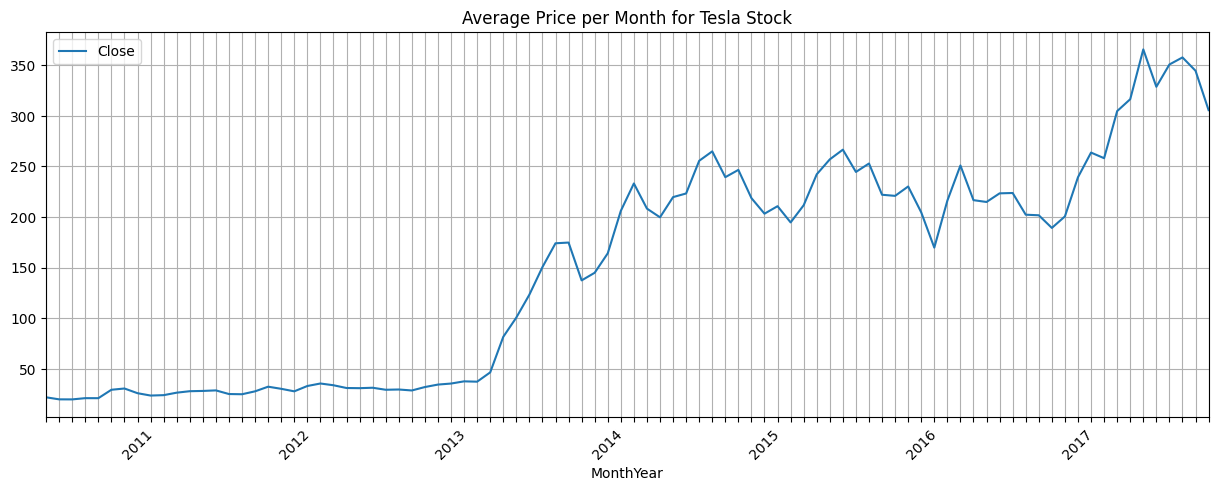

In [53]:
data.plot(y='Close', kind='line', figsize=(15,5), title='Average Price per Month for Tesla Stock')
plt.xticks(data.index, rotation=45)
plt.grid()

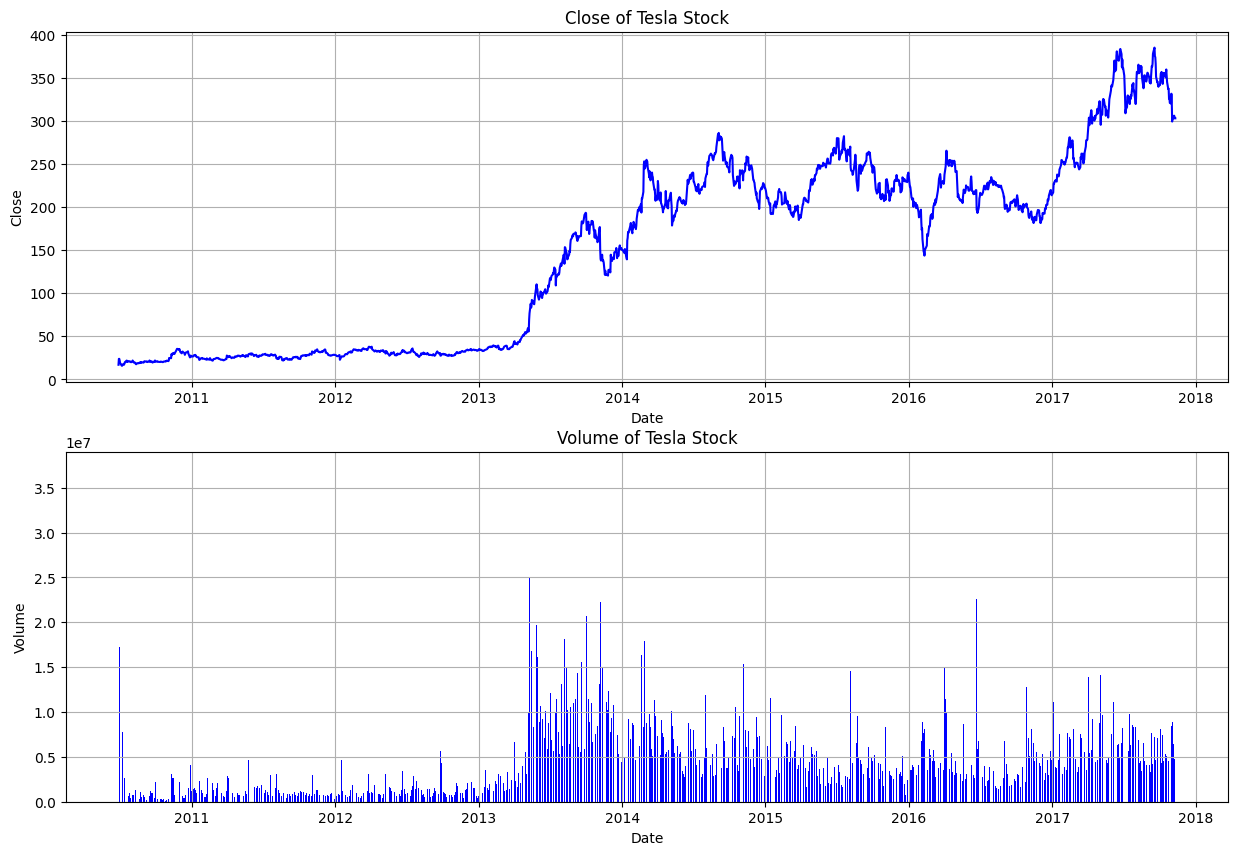

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.plot(tesla_stock['Date'], tesla_stock['Close'], color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Close')
ax1.set_title('Close of Tesla Stock')
ax1.grid()
ax2.bar(tesla_stock['Date'], tesla_stock['Volume'], color='blue')
ax2.set_xlabel('Date')
ax2.set_ylabel('Volume')
ax2.set_title('Volume of Tesla Stock')
ax2.grid()
plt.show()

### Tesla Stock Price - Volume Graph

In [55]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x=tesla_stock['Date'],
                open=tesla_stock['Open'],
                high=tesla_stock['High'],
                low=tesla_stock['Low'],
                close=tesla_stock['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()


In [56]:
from plotly import graph_objs as go
fig = go.Figure(data=[go.Candlestick(x=tesla_stock.index,open=tesla_stock['Open'],high=tesla_stock['High'],low=tesla_stock['Low'],close=tesla_stock['Close'])])

fig.show()

### Korrelation zwischen Aktien


<AxesSubplot: >

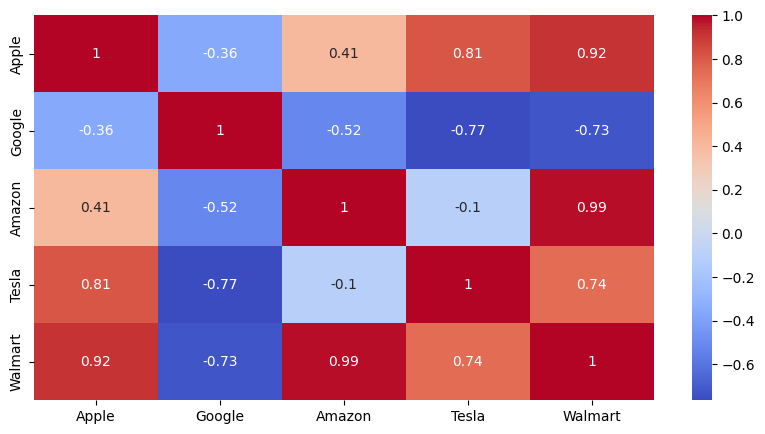

In [57]:
stocks = pd.concat([apple_stock['Close'], google_stock['Close'], amazon_stock['Close'], tesla_stock['Close'], walmart_stock['Close']], axis=1)
stocks.columns = ['Apple', 'Google', 'Amazon', 'Tesla', 'Walmart']
stocks

plt.figure(figsize=(10,5))
sns.heatmap(stocks.corr(), annot=True, cmap='coolwarm')



c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1507: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:1609: UserWarning

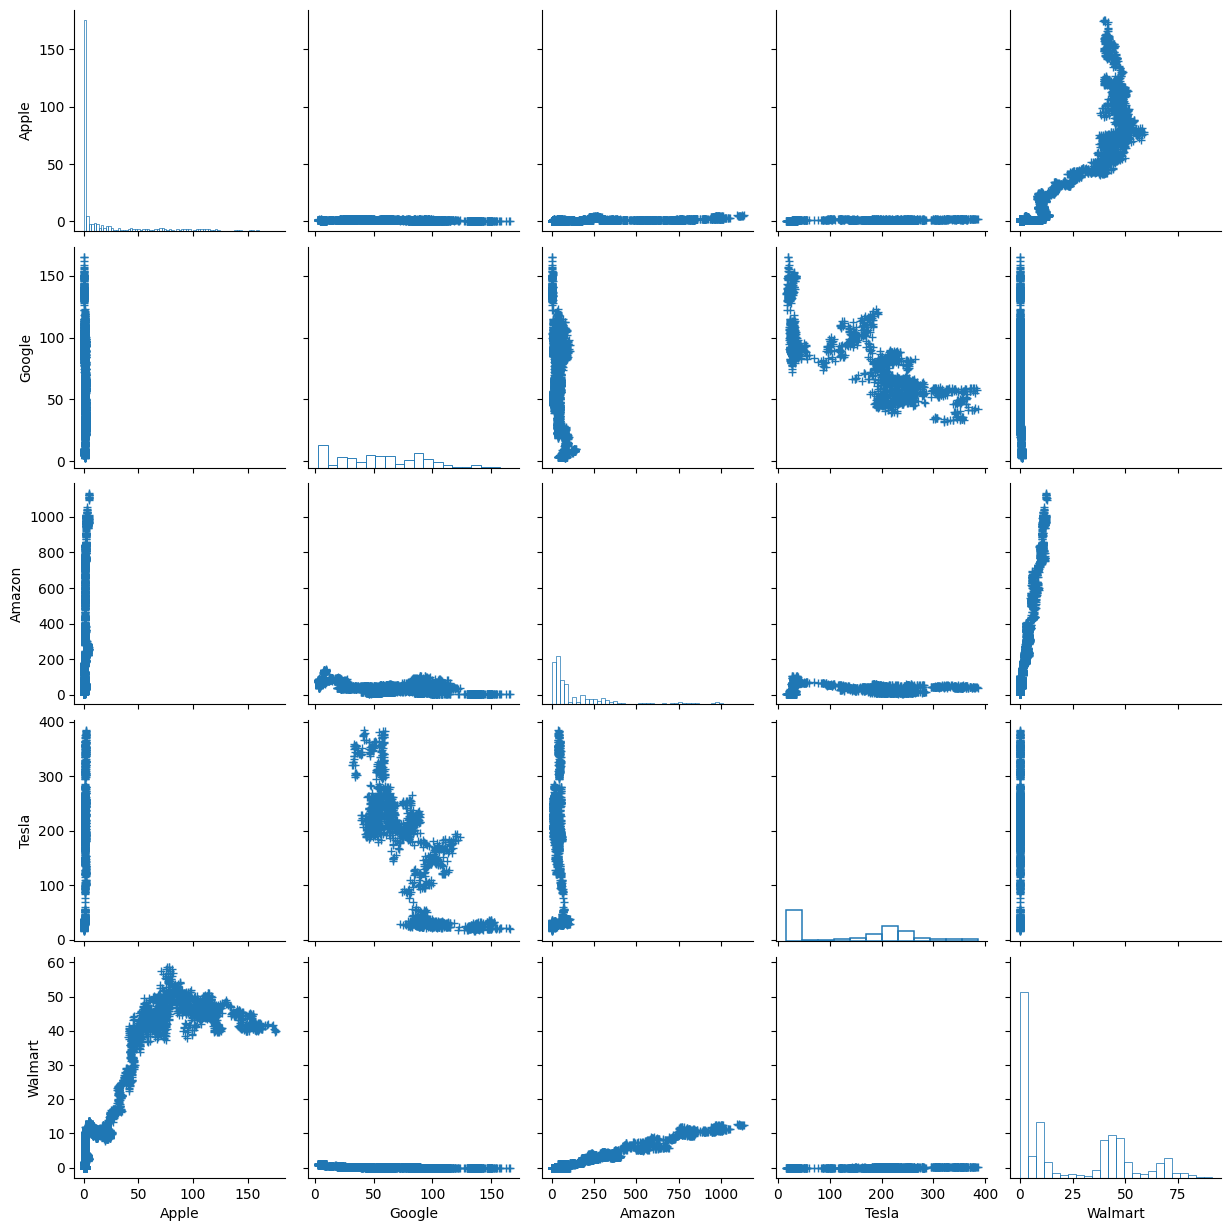

In [58]:
sns.pairplot(stocks, palette='coolwarm',plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False))


### Close Prices of all Stocks

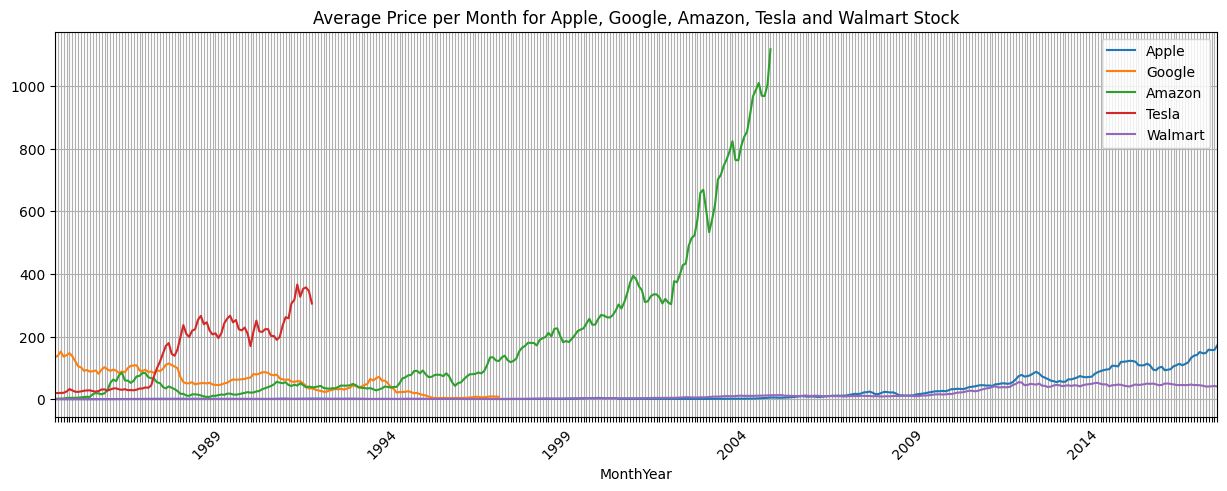

In [59]:
stocks = pd.concat([apple_stock['Close'], google_stock['Close'], amazon_stock['Close'], tesla_stock['Close'], walmart_stock['Close']], axis=1)
stocks.columns = ['Apple', 'Google', 'Amazon', 'Tesla', 'Walmart']
stocks

stocks['MonthYear'] = apple_stock['Date'].dt.to_period('M')

stocks = stocks.groupby(['MonthYear']).mean()

stocks.plot(figsize=(15,5), title='Average Price per Month for Apple, Google, Amazon, Tesla and Walmart Stock')
plt.xticks(stocks.index, rotation=45)
plt.grid()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.

c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\pyfolio\plotting.py:648: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



Start date,2017-12-27
End date,2022-12-22
Total months,59
,Backtest
Annual return,16.3%
Cumulative returns,112.6%
Annual volatility,25.1%
Sharpe ratio,0.73
Calmar ratio,0.58
Stability,0.85
Max drawdown,-28.3%


c:\Users\bilal\AppData\Local\Programs\Python\Python310\lib\site-packages\pyfolio\plotting.py:805: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



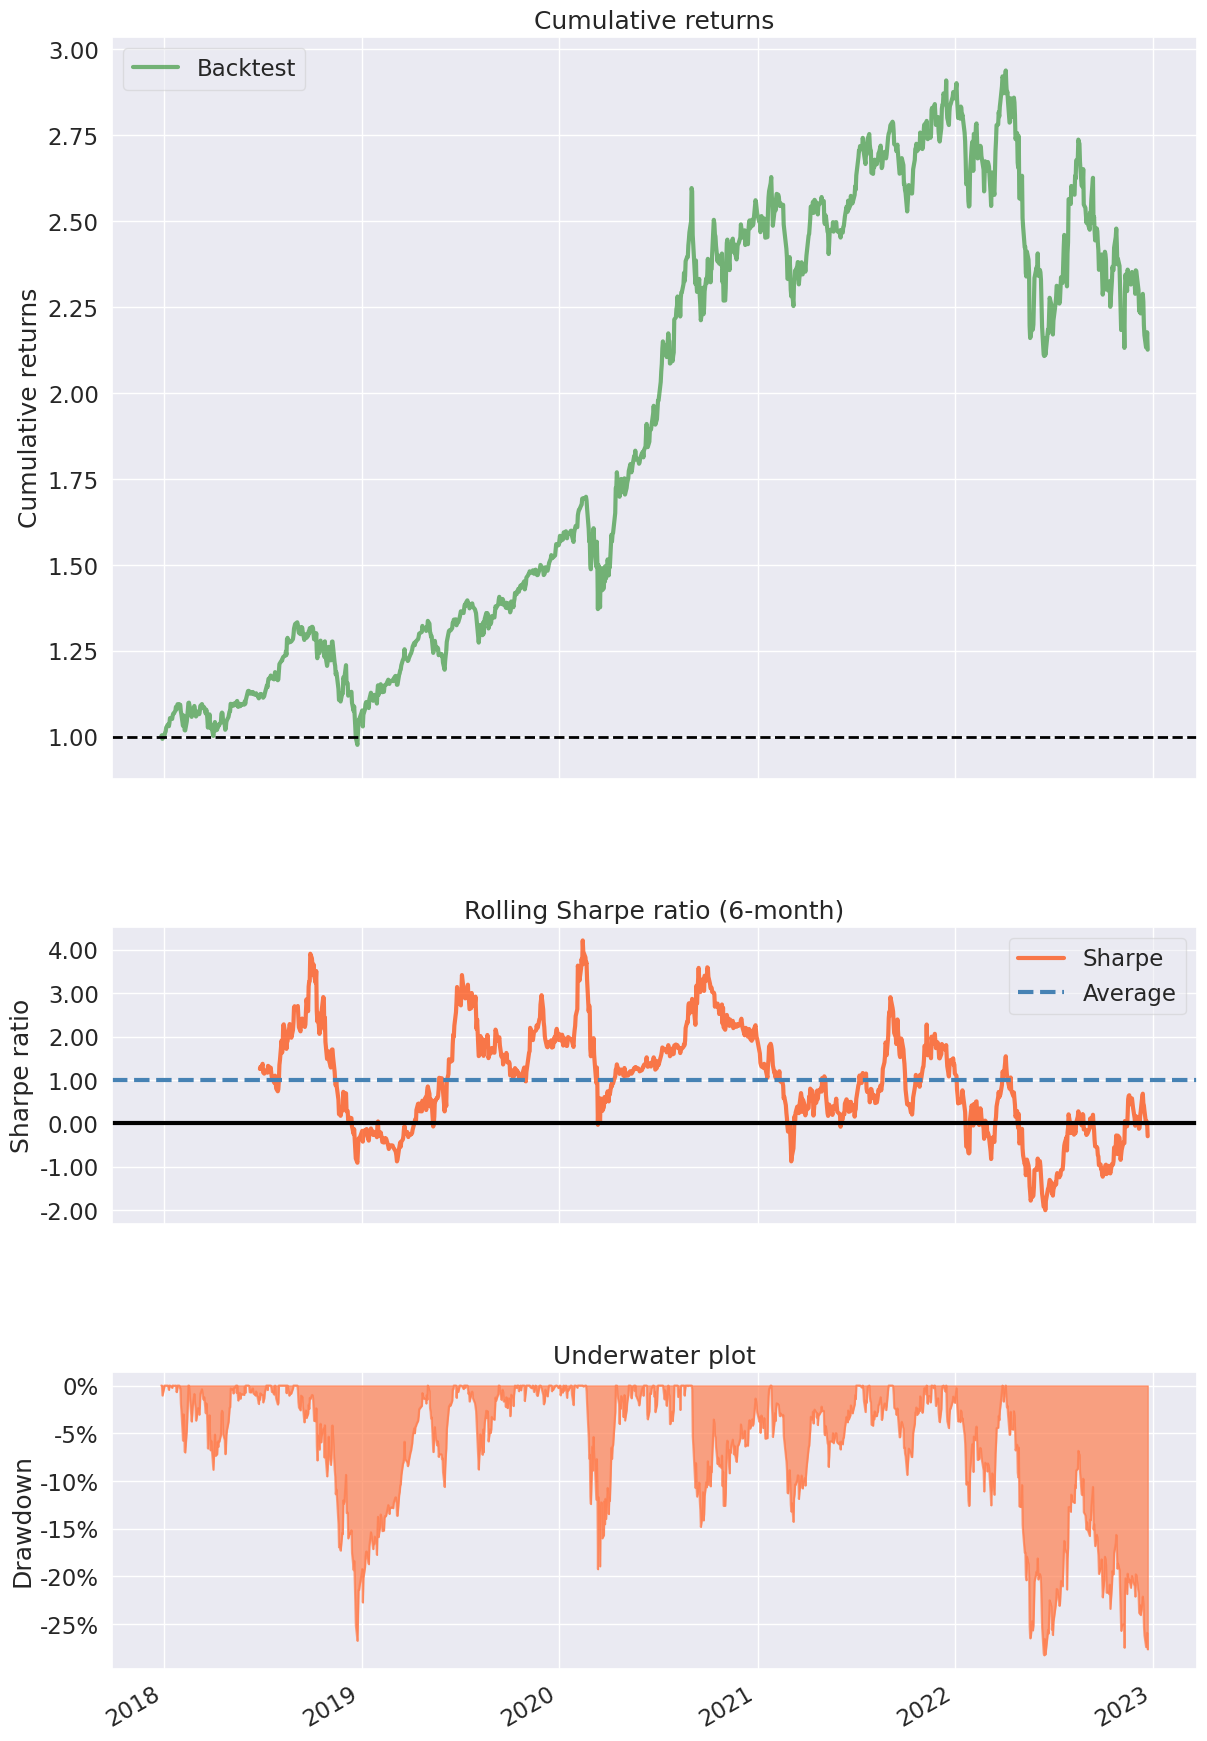

In [60]:
tickers_list = ['AAPL', 'AMZN', 'WMT']

data = pd.DataFrame(columns=tickers_list)

import yfinance as yf
for ticker in tickers_list:
     data[ticker] = yf.download(ticker, period='5y',)['Adj Close']
        
data = data.pct_change().dropna().mean(axis=1)

import pyfolio as pf

pf.create_simple_tear_sheet(data)